In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\prasa\Downloads\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.notnull().sum()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


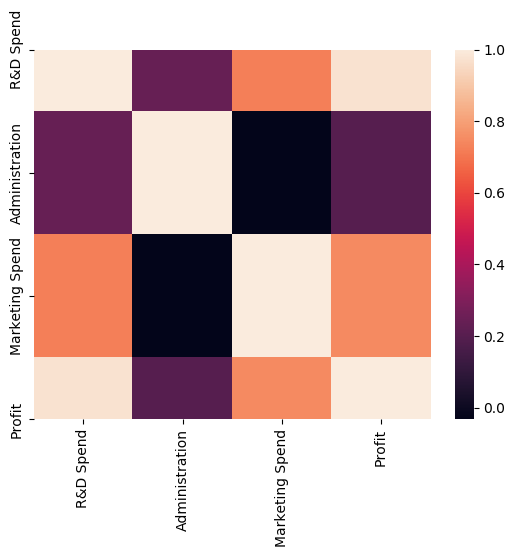

In [8]:
sns.heatmap(data.corr())

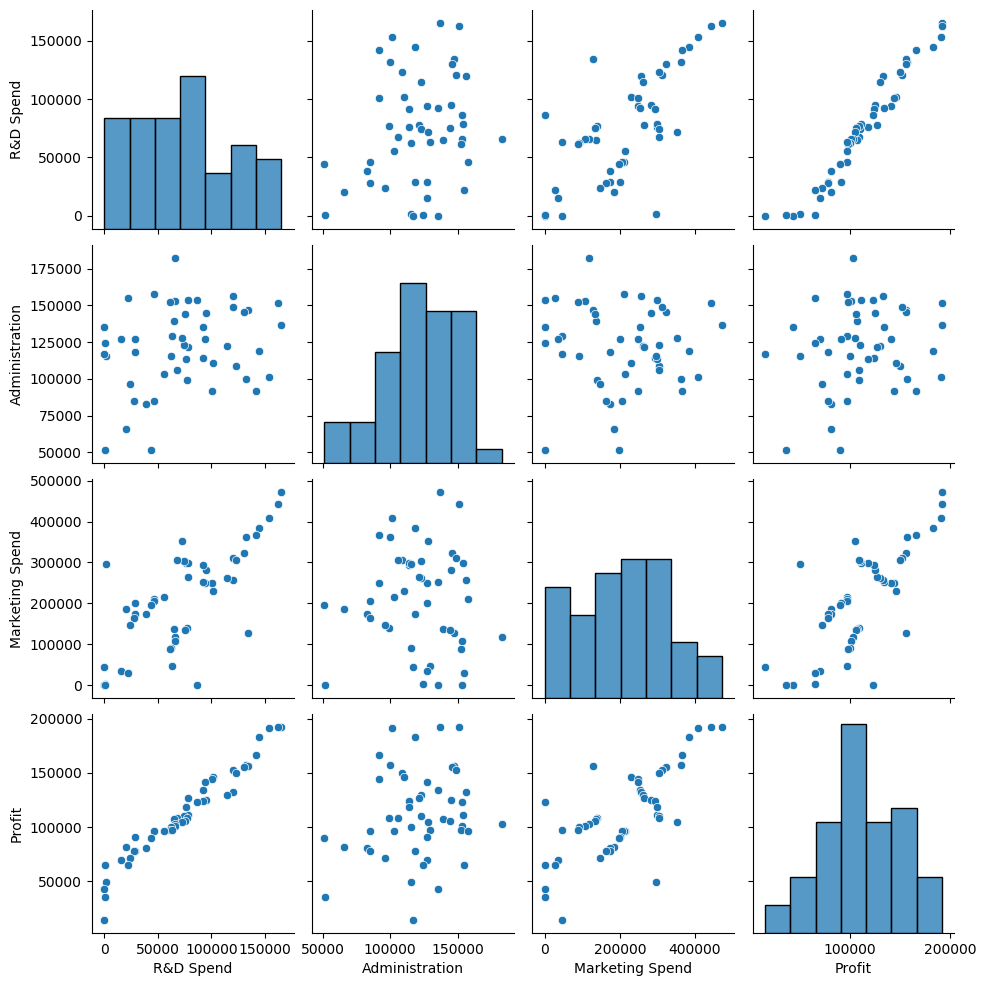

In [9]:
sns.pairplot(data)

In [10]:
data.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [12]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [13]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [14]:
X = data.drop('Profit', axis=1) 
# Target (output)
y = data['Profit']
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    
    random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

def calculateRegressionMetrics(algorithm, predict, testY):
    # Calculate metrics
    mae = mean_absolute_error(testY, predict)
    mse = mean_squared_error(testY, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(testY, predict)
    
    print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
    print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
    print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"{algorithm} R2 Score: {r2:.2f}")
    
    plt.figure(figsize=(7, 7))
    plt.scatter(testY, predict, color='blue', alpha=0.6)
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{algorithm} Predicted vs Actual Values")
    plt.grid(True)
    plt.show()

KNN Regressor Mean Absolute Error (MAE): 14869.75
KNN Regressor Mean Squared Error (MSE): 570983489.76
KNN Regressor Root Mean Squared Error (RMSE): 23895.26
KNN Regressor R2 Score: 0.29


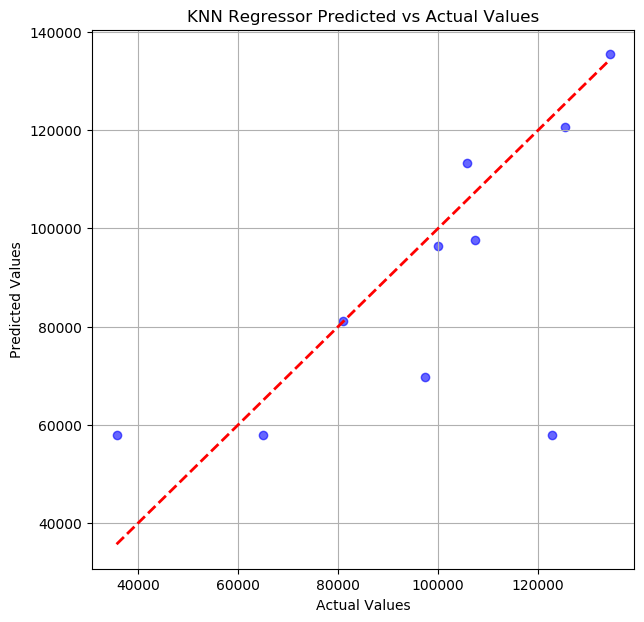

In [17]:
from sklearn.neighbors import KNeighborsRegressor
import os
import joblib

model = 'knn_regressor.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    knn_regressor = joblib.load(model)
    predict = knn_regressor.predict(X_test)
    calculateRegressionMetrics("KNN Regressor", predict, y_test)
else:
    knn_regressor = KNeighborsRegressor()
    # Train the regressor on the training data
    knn_regressor.fit(X_train, y_train)
    # Make predictions on the test data
    predict = knn_regressor.predict(X_test)
    joblib.dump(knn_regressor, model)
    print("KNN Regressor trained and model weights saved.")
    calculateRegressionMetrics("KNN Regressor", predict, y_test)

Decision Tree Regressor Mean Absolute Error (MAE): 12310.29
Decision Tree Regressor Mean Squared Error (MSE): 196528140.43
Decision Tree Regressor Root Mean Squared Error (RMSE): 14018.85
Decision Tree Regressor R2 Score: 0.76


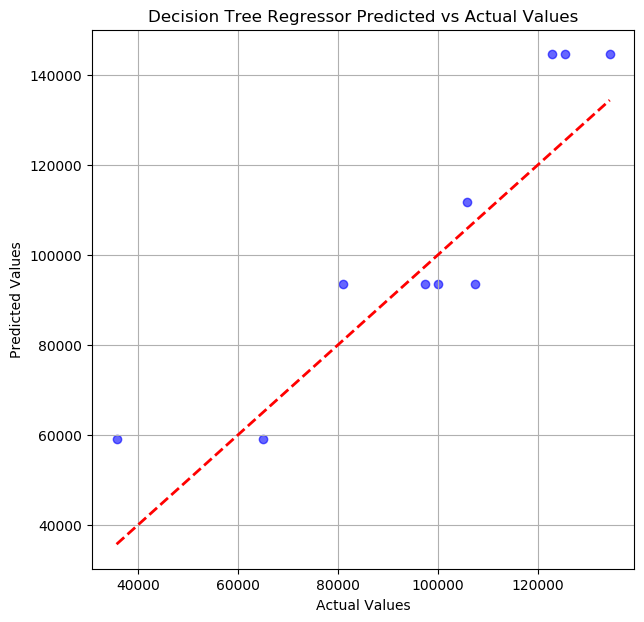

In [18]:
from sklearn.tree import DecisionTreeRegressor
import os
import joblib

model = 'dtr_regressor.pkl'

if os.path.exists(model):
    # Load the model from the pkl file
    dt_regressor = joblib.load(model)
    predict = dt_regressor.predict(X_test)
    calculateRegressionMetrics("Decision Tree Regressor", predict, y_test)
else:
    # Initialize the Decision Tree Regressor with optional hyperparameters
    dt_regressor = DecisionTreeRegressor(max_depth=25,min_samples_split=15,min_samples_leaf=5,max_features=None,
    ccp_alpha=0.001,random_state=42)
    # Train the regressor on the training data
    dt_regressor.fit(X_train, y_train)
    # Make predictions on the test data
    predict = dt_regressor.predict(X_test)
    # Save the trained model
    joblib.dump(dt_regressor, model)
    print("Decision Tree Regressor trained and model weights saved.")
    calculateRegressionMetrics("Decision Tree Regressor", predict, y_test)

LinearRegression Mean Absolute Error (MAE): 6979.18
LinearRegression Mean Squared Error (MSE): 80929465.49
LinearRegression Root Mean Squared Error (RMSE): 8996.08
LinearRegression R2 Score: 0.90


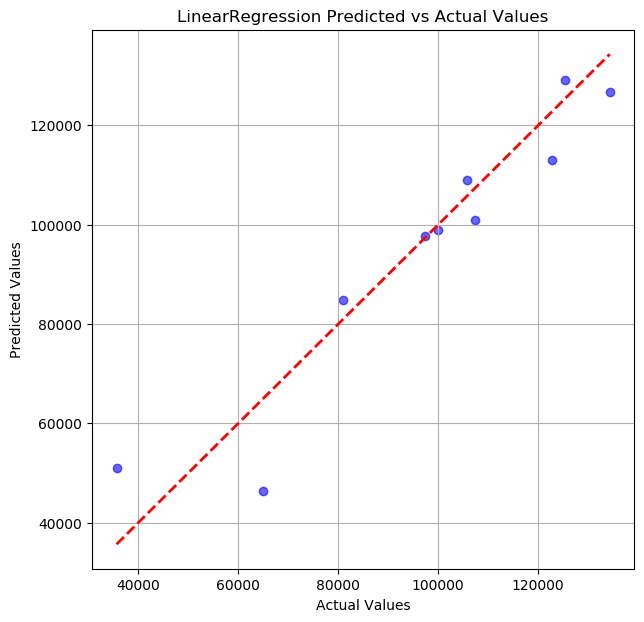

In [22]:
from sklearn.linear_model import LinearRegression
import os
import joblib

model = 'LinearRegression.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    LinearRegression = joblib.load(model)
    predict = LinearRegression.predict(X_test)
    calculateRegressionMetrics("LinearRegression", predict, y_test)
else:
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
   
    predict =lr.predict(X_test)
    
    joblib.dump(lr, model)
    print("LinearRegression trained and model weights saved.")
    calculateRegressionMetrics("LinearRegression", predict, y_test)
    X_test

RandomForestRegressor Mean Absolute Error (MAE): 6037.49
RandomForestRegressor Mean Squared Error (MSE): 62627409.56
RandomForestRegressor Root Mean Squared Error (RMSE): 7913.75
RandomForestRegressor R2 Score: 0.92


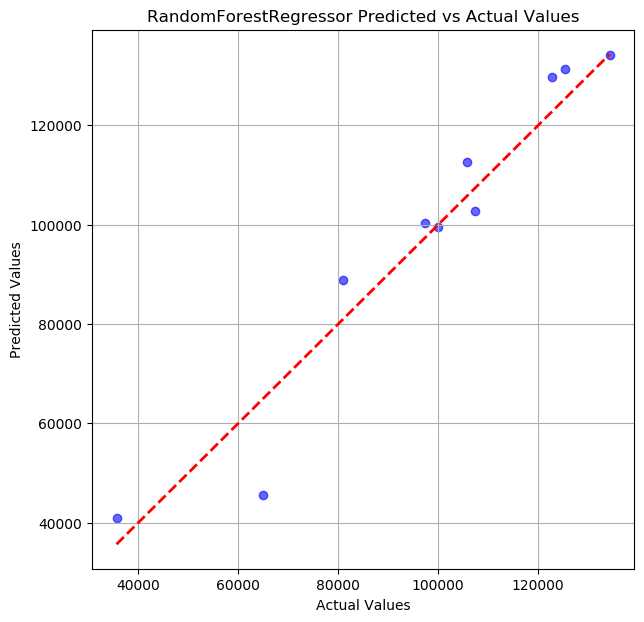

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import os
import joblib

model = 'RandomForestRegressor.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    RandomForestRegressor = joblib.load(model)
    predict = RandomForestRegressor.predict(X_test)
    calculateRegressionMetrics("RandomForestRegressor", predict, y_test)
else:
    rf_regressor = RandomForestRegressor(
    n_estimators=200,      
    random_state=42,
    n_jobs=-1           
    )
    rf_regressor .fit(X_train, y_train)
   
    predict =rf_model .predict(X_test)
    
    joblib.dump(rf_regressor , model)
    print("RandomForestRegressor trained and model weights saved.")
    calculateRegressionMetrics("RandomForestRegressor", predict, y_test)

In [23]:
data=pd.read_csv(r"C:\Users\prasa\Downloads\test.csv")
data 

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [24]:
data.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [26]:
data

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [27]:
model = 'RandomForestRegressor.pkl'
rf_regressor = joblib.load(model)
pred_scaled = rf_regressor.predict(data)

In [28]:
data["pred_scaled"]=pred_scaled

In [29]:
data

,R&D Spend,Administration,Marketing Spend,State,pred_scaled
0,165349.20,136897.80,471784.10,2,190436.74710
1,162597.70,151377.59,443898.53,0,190896.20965
2,153441.51,101145.55,407934.54,1,188030.88435
3,144372.41,118671.85,383199.62,2,176412.85550
4,142107.34,91391.77,366168.42,1,166885.37515
5,131876.90,99814.71,362861.36,2,158648.39215
6,134615.46,147198.87,127716.82,0,152285.34780
7,130298.13,145530.06,323876.68,1,154952.86445
8,120542.52,148718.95,311613.29,2,145947.85685
9,123334.88,108679.17,304981.62,0,147911.39075
